In [1]:
import numpy as np
import scipy
from scipy.linalg import lstsq
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pylab 
import scipy.stats as ss
import math

import numpy.matlib

In [180]:
def linreg(x, y, degree=1):
    from scipy.linalg import lstsq
    x=x-min(x)
    x=x/max(x)
    x=np.array(x)
   
  #Create a Design Matrix DM
    n = len(x)
    q = degree+1
    y=np.array(y).reshape((n,1))
    DM=np.matlib.ones((n,degree+1))
    x=np.array(x).reshape((n,1))
    DM[:,1] = x
    if degree>1:
        for i in range(2,degree+1):
            DM[:,i]=x**i
  #Calculate goodness of fit measures
  #Residual sum of squares
    coef, rss, rnk, s = lstsq(DM, y)
  #Coefficient of determination: R^2
    tss = sum((y-mean(y))**2)
  #Adjusted Coefficient of determination: R^2
    yhat = DM.dot(coef)
    ess= sum((yhat-mean(y))**2)
    R2=1-rss/tss
    R2adj = 1 - ( (n-1)/(n-degree) ) * (1-R2)
  #AIC
    aic=2*degree + n*ln(rss)
    
    print("RSS: ", rss, "\n")
    print("TSS: ", tss, "\n")
    print("R-squared: ", R2, "\n")
    print("Adjusted R-squared: ", R2adj, "\n")
    print("AIC: ", aic, "\n")
    d = {'RSS':rss,
       'TSS':tss,
       'R2':R2,
        'R2adj':R2adj,
        'aic':aic,
        'yhat':yhat,
        'coef':coef,
        'ess':ess}
    return(d)

In [7]:
import pandas as pd
auto=pd.read_csv("auto-data.csv")
auto=auto.dropna(axis='rows')

mpg=auto.mpg
dis=auto.displacement
horse=auto.horsepower
wei=auto.weight
ace=auto.acceleration

## Polynomial regression

In [170]:
def linreg(x, y, degree=1):
    
    x=x-min(x)
    x=x/max(x)  
  #Create a Design Matrix DM
    n = len(x)
    q = degree+1
    DM=np.matlib.ones((n,degree+1))
    DM[:,1] = x
    if degree>1:
        for i in range(2,degree+1):
            DM[:,i]=x**i
  #Calculate goodness of fit measures
    coef, rss, rnk, s = lstsq(DM, y)
    yhat = DM.dot(coef)
  #Coefficient of determination: R^2
    tss = np.sum((y-np.mean(y))**2)
    if(rss.size>0):
        RSS=rss
        ess= tss-RSS
        R2=1-(RSS/tss)
        R2adj = 1 - ( (n-1)/(n-q-1) ) * (1-R2)
  #AIC approximation for normally distributed error
        LL=(n)*np.log(2*math.pi)+(n)*np.log(RSS/n)+n
        aic=2*q+LL
    else:
        RSS=9999
        ess=9999
        R2=9999
        R2adj =9999
  #AIC approximation for normally distributed error
        aic=9999
  #Adjusted Coefficient of determination: R^2     
    
    if(verbose==True):
        print("RSS: ", RSS, "\n")
        print("TSS: ", tss, "\n")
        print("R-squared: ", R2, "\n")
        print("Adjusted R-squared: ", R2adj, "\n")
        print("AIC: ", aic, "\n")
    d = {'RSS':RSS,
       'TSS':tss,
       'R2':R2,
        'R2adj':R2adj,
        'aic':aic,
        'yhat':yhat,
        'coef':coef,
        'ess':ess}
    return(d)

## Binsmooth Regression

In [11]:
def binsmoothREG(x, y, binlen=10, knotsdef=[],verbose=False):
    
  #Scale data to [0,1]
    x=x-min(x)
    x=x/max(x)
   
    index=np.argsort(x,axis=0,kind="stable")
    
   
 ##number of rows
    n = x.shape[0]
    y=np.array(y).reshape((392,1))
    y = y[index]
    x =np.sort(x,kind="stable")
  #Devide data into bins
    if len(knotsdef)>1:
        nbins = knotsdef
    else:
        nbins = int(np.floor(n / binlen))
    q=nbins+1
  #Create Design Matrix without intercept
    DM = np.matlib.zeros((n,nbins+1))
  #Set all elements not corresponding to region j equal 0
    for i in range(nbins):
        DM[range(i*binlen,(i+1)*binlen),[i]] = int(1)
    DM[range(nbins*binlen,n),[nbins]]=int(1)
  #Perform Linear Regreesion
    coef,rss,rnk,s= lstsq(DM,y)
  #Coefficient of determination: R^2
    tss = np.sum((y-np.mean(y))**2)
    yhat = DM.dot(coef)  
 #Adjusted Coefficient of determination: R^2
    if(rss.size>0):
        RSS=rss
        ess= tss-RSS
        R2=1-(RSS/tss)
        R2adj = 1 - ( (n-1)/(n-q-1) ) * (1-R2)
  #AIC approximation for normally distributed error
        LL=(n)*np.log(2*math.pi)+(n)*np.log(RSS/n)+n
        aic=2*q+LL
    else:
        RSS=9999
        ess=9999
        R2=9999
        R2adj =9999
  #AIC approximation for normally distributed error
        aic=9999
        
    d = {'RSS':RSS,
       'TSS':tss,
       'R2':R2,
        'R2adj':R2adj,
        'aic':aic,
        'yhat':yhat,
        'coef':coef,
        'ess':ess}
    return(d)


## Bspline

In [274]:
def sortfunc(x,y,knots):
    xk =np.array(range(1,knots+1))/(knots+1)
    #Scale data to [0,1]
    x=x-min(x)
    x=x/max(x)
    n=len(x)
  #Sort x values in ascending order
    y=np.array(y).reshape((n,1))
    index=np.argsort(x,axis=0,kind="stable")
    y = y[index]
    x =np.sort(x,kind="stable")
    return x,y,xk
def my_func(x,k1,k2):
    if x >= k1 and x < k2:
        return 1
    else:
        return 0
def basis(x, degree, i, knots):
       
    if(degree == 0):
        iB=np.zeros(len(x))
        for ix in range(len(x)):
            iB[ix]=my_func(x[ix],knots[i],knots[i+1])
        B=iB
        return B
    else:
        if((knots[degree+i] - knots[i]) == 0)and ((knots[i+degree+1] - knots[i+1]) == 0): 
            B=0 
        elif((knots[degree+i] - knots[i]) != 0)and ((knots[i+degree+1] - knots[i+1]) == 0):
            alpha1 = (x - knots[i])/(knots[degree+i] - knots[i])  
            B=alpha1*basis(x, (degree-1), i, knots)
        elif((knots[degree+i] - knots[i]) == 0)and ((knots[i+degree+1] - knots[i+1]) != 0):
            alpha2 = (knots[i+degree+1] - x)/(knots[i+degree+1] - knots[i+1])
            B=alpha2*basis(x, (degree-1), i+1, knots)
        else:
            alpha1 = (x - knots[i])/(knots[degree+i] - knots[i])
            alpha2 = (knots[i+degree+1] - x)/(knots[i+degree+1] - knots[i+1])
            B=alpha2*basis(x, (degree-1), (i+1), knots)+alpha1*basis(x, (degree-1), i, knots)
        return B 


#Create bspline Desin Matrix
def bspline(x, degree, knotpos):
 
  #Number of basis
    K = len(knotpos) + degree + 1 
  #Number of observations
    n = len(x)
  #Set Boundary knots
    Boundaryknots = [0,1]
  #create new vector with knot positons 
    knotpos = np.concatenate((np.repeat(Boundaryknots[0], (degree+1)), knotpos, np.repeat(Boundaryknots[1], (degree+1))), axis=None) 

    
  #Create design matrix
    DM = np.matlib.zeros((n,K)) 
    for j in range(K):
        
        bdm= basis(x, degree, j, knotpos)
        
        DM[:,j]=bdm.reshape((n,1))
   
    index=np.argwhere(x == Boundaryknots[1])
    DM[index, K-1] = 1 
  #Return DM  
    return(DM) 



def bsplinereg(x, y, degree, knots=0, knotsdef=[],verbose=False):
    #Scale data to [0,1]
    x,y,xk=sortfunc(x,y,knots)
    n=len(x)
    
  #Calculate knot postions
    if(knots == 0):
        knotpos = []
    else:
        knotpos = np.array(range(1,knots+1))/(knots+1)
    if(len(knotsdef)>0):
        knotpos = knotsdef
  #Create Design Matrix 
    DM = bspline(x, degree, knotpos) 
    q=len(knotpos) + degree + 1 
#Perform Linear Regreesion
    coef,rss,rnk,s= lstsq(DM,y)
  #Coefficient of determination: R^2
    tss = np.sum((y-np.mean(y))**2)
    yhat = DM.dot(coef)  
 #Adjusted Coefficient of determination: R^2
    if(rss.size>0):
        RSS=rss
        ess= tss-RSS
        R2=1-(RSS/tss)
        R2adj = 1 - ( (n-1)/(n-q-1) ) * (1-R2)
  #AIC approximation for normally distributed error
        LL=(n)*np.log(2*math.pi)+(n)*np.log(RSS/n)+n
        aic=2*q+LL
    else:
        coef=np.where(coef < 0, 0, coef)
        q=len(np.argwhere(coef!=0))
        RSS=np.sum((y-DM.dot(coef).flatten())**2)
        ess=tss-rss
        R2=1-(RSS/tss)
        R2adj =1 - ( (n-1)/(n-q-1) ) * (1-R2)
  #AIC approximation for normally distributed error
        aic=(n)*np.log(2*math.pi)+(n)*np.log(RSS/n)+n+2*q
    if(verbose):
        
        print("RSS: ", RSS, "\n")
        print("TSS: ", tss, "\n")
        print("R-squared: ", R2, "\n")
        print("Adjusted R-squared: ", R2adj, "\n")
        print("AIC: ", aic, "\n")
    d = {'RSS':RSS,
         'TSS':tss,
         'R2':R2,
         'R2adj':R2adj,
         'aic':aic,
         'yhat':yhat,
         'coef':coef,
         'ess':ess}
    return(d)

bsplinereg(auto.horsepower,mpg,knots=34,degree=3)

{'RSS': array([6215.01087573]),
 'TSS': 23818.993469387755,
 'R2': array([0.73907332]),
 'R2adj': array([0.7109849]),
 'aic': array([2271.72448835]),
 'yhat': matrix([[26.66815531],
         [26.66815531],
         [40.46167996],
         [40.46167996],
         [40.46167996],
         [40.4070598 ],
         [32.60031512],
         [32.60031512],
         [32.60031512],
         [32.60031512],
         [31.54388954],
         [31.54388954],
         [31.37041241],
         [33.32984637],
         [33.32984637],
         [33.72470495],
         [33.72470495],
         [33.72470495],
         [33.72470495],
         [33.72470495],
         [33.88831921],
         [34.12081175],
         [34.12081175],
         [34.43385921],
         [34.43385921],
         [34.43385921],
         [34.72211673],
         [34.86580717],
         [34.86580717],
         [34.86580717],
         [34.86580717],
         [34.86580717],
         [34.86580717],
         [34.86580717],
         [34.86580717],
  

## C-spline

In [ ]:
#R(x,z) for cubic spline on [0,1]
def rk(x,z):
    return ((z-0.5)**2 - 1/12) * ((x-0.5)**2 - 1/12)/4 - ((abs(x-z)-0.5)**4 - (abs(x-z)-0.5)**2 / 2+7/240) / 24 
def rk2(x):
        return ((x-0.5)**2 - 1/12) * ((x-0.5)**2 - 1/12)/4 - ((-0.5)**4 - (-0.5)**2 / 2+7/240) / 24 

#Set up the penalized regression spline penalty matrix
def splS(xk):
    q=len(xk)+2
    S=np.matlib.zeros((q,q))
    xkm=np.fromfunction(lambda i, j: rk(xk[i],xk[j]), (q-2, q-2), dtype=int)
    S[2:,2:]=xkm
    return(S)

#Set up model matrix for cubic penalized regression spline
def splX(x,xk):
    q=len(xk)+2
    n=len(x)
    X=np.matlib.ones((n,q))
    x=x.reshape((n,1))
    X[:,1]=x
    for i in range(q-2):
        X[:,i+2]=np.apply_along_axis(rk,1,x,xk[i])
    return(X)

#Function for calculation the square root of a matrix
def matsqrt(S):
    val,vec=np.linalg.eig(S)
    rS=vec.dot(np.diag(np.sqrt(val))).dot(vec.T)
    return(rS)

In [3]:
def csreg(x, y, knots, knotsdef=[]):
    
  #Scale data to [0,1]
    x=x-min(x)
    x=x/max(x)
  #Sort x values in ascending order
    x=np.array(x)
    y=np.array(y)
    index=np.argsort(x,axis=0,kind="stable")
    y = y[index]
    x =np.sort(x,kind="stable")
    n = len(x) 
  
  #Calculate knot postions
    if(len(knotsdef)>0):
        knotpos = knotsdef
    else:
        knotpos =  np.array(range(1,knots+1)) / (knots+1) 
  
  #Create Design Matrix
    DM= splX (x,knotpos)
    q=len(knotpos)+2
  #Perform Linear Regreesion
    coef, rss, rnk, s = lstsq(DM, y)
  #Coefficient of determination: R^2
    tss = np.sum((y-np.mean(y))**2)
   #Adjusted Coefficient of determination: R^2
    if(rss.size>0):
        RSS=rss
        ess= tss-RSS
        R2=1-(RSS/tss)
        R2adj = 1 - ( (n-1)/(n-q-1) ) * (1-R2)
  #AIC approximation for normally distributed error
        LL=(n)*np.log(2*math.pi)+(n)*np.log(RSS/n)+n
        aic=2*q+LL
    else:
        coef=np.where(coef < 0, 0, coef)
        q=len(np.argwhere(coef!=0))
        RSS=np.sum((y-DM.dot(coef).flatten())**2)
        ess=tss-rss
        R2=1-(RSS/tss)
        R2adj =1 - ( (n-1)/(n-q-1) ) * (1-R2)
  #AIC approximation for normally distributed error
        aic=(n)*np.log(2*math.pi)+(n)*np.log(RSS/n)+n+2*q
    
    
    d = {'RSS':rss,
       'TSS':tss,
       'R2':R2,
        'R2adj':R2adj,
        'aic':aic,
        'knots':knots,
        'yhat':DM.dot(coef),
        'coef':coef,
        'ess':ess}
    return(d)

## Penalized regression

In [14]:
def prsfit(x,y,lanbda=1,knots=3,knotsdef=0):
    x=x-min(x)
    x=x/max(x)
  #Sort x values in ascending order
    x=np.array(x)
    y=np.array(y)
    index=np.argsort(x,axis=0,kind="stable")
    y = y[index]
    x =np.sort(x,kind="stable")
    n = len(x) 
  
 
  #Calculate knot postions
    if(type(knotsdef)!=int):
        knotpos = knotsdef
    else:
        knotpos =  np.array(range(1,knots+1)) / (knots+1) 
  
  #Create Design Matrix
    q=len(knotpos)+2
    n=len(x)
    DM =np.concatenate((splX(x,knotpos), matsqrt(splS(knotpos))*math.sqrt(lanbda)), axis=0)
    y2=np.append(y,np.zeros(q))
    
 ###Calculate hat matrix using persudo-inverse of design matrix 
    hat=DM.dot(np.linalg.pinv(DM)).T
    trace=np.diag(hat)[0:n].sum()
 
   #Perform Linear Regreesion
    coef, rss, rnk, s = lstsq(DM, y2)
  #Coefficient of determination: R^2
    tss = np.sum((y-np.mean(y))**2)
  #Adjusted Coefficient of determination: R^2
    yhat = DM.dot(coef)  
    ess= tss-rss
    R2=1-(rss/tss)
    R2adj = 1 - ( (n-1)/(n-q) ) * (1-R2)
  #AIC approximation for normally distributed error
    LL=(n)*np.log(2*math.pi)+(n)*np.log(rss/n)+n
    aic=2*q+LL
    d = {'RSS':rss,
       'TSS':tss,
       'R2':R2,
        'R2adj':R2adj,
        'aic':aic,
         'trace':trace,
        'yhat':yhat,
        'coef':coef,
        'ess':ess}
    return(d)


## Cross-validation

In [16]:
def GCV(x,y,knots):
       #Scale data to [0,1]
    n = len(x)
    lanbdax = 1e-9
   
    V= np.zeros(60)
    lambdai = np.zeros(60)
  
    for i in range(60):
        mod = prsfit(x,y, lanbda=lanbdax,knotsdef=xk)
        trA = mod["trace"]
        yhat=mod["yhat"].flatten().T
        yhat=yhat[0:n]
        hat=np.power((y-yhat),2)
        rss=hat.sum()
        V[i]= n*rss / ((n-trA)**2)
        lambdai[i]=lanbdax
        lanbdax = lanbdax*1.5
    
    posi= np.argmin(V)
    minV = np.amin(V)
    optlambda = lambdai[posi]
    print("Lowest GCV score is: ", minV, "\n")
    print("Optimal smoothing parameter lamdda: ", optlambda, "\n")
    d={'logv':np.log(V),'minv':minV,'lambda':optlambda,'k':knots}
    return d


In [326]:
GCV(dis,mpg,22)

Lowest GCV score is:  18.087920289840902 

Optimal smoothing parameter lamdda:  2.525116829404235e-05 



{'logv': array([2.91684515, 2.91683807, 2.91682746, 2.91681157, 2.91678779,
        2.91675224, 2.9166992 , 2.91662025, 2.91650318, 2.91633057,
        2.91607808, 2.91571297, 2.91519347, 2.91447025, 2.9134918 ,
        2.91221425, 2.91061482, 2.90870499, 2.90654036, 2.9042254 ,
        2.90191039, 2.89977199, 2.89797115, 2.89660539, 2.89569746,
        2.89524433, 2.89529289, 2.89598164, 2.89752534, 2.90016479,
        2.90410276, 2.90942358, 2.91599684, 2.92340678, 2.93098733,
        2.93799913, 2.9438634 , 2.94830859, 2.95136751, 2.95327555,
        2.95435277, 2.95491806, 2.9552462 , 2.95556676, 2.9561054 ,
        2.95716098, 2.95919144, 2.96285174, 2.96889429, 2.9778606 ,
        2.98966139, 3.00336981, 3.01749518, 3.03057957, 3.04167536,
        3.0504567 , 3.05705659, 3.06183534, 3.06520571, 3.06753993]),
 'minv': 18.087920289840902,
 'lambda': 2.525116829404235e-05,
 'k': 22}

In [328]:
GCV(ace,mpg,19)

Lowest GCV score is:  48.932205210157754 

Optimal smoothing parameter lamdda:  0.01105733232094001 



{'logv': array([3.90861326, 3.90860944, 3.90860375, 3.90859528, 3.90858275,
        3.90856431, 3.90853747, 3.908499  , 3.90844515, 3.90837265,
        3.90828109, 3.9081781 , 3.9080885 , 3.90806667, 3.90820566,
        3.90862752, 3.90943699, 3.91064483, 3.91211173, 3.91357479,
        3.9147533 , 3.91545616, 3.91561823, 3.91525975, 3.91442104,
        3.91313014, 3.91141914, 3.90935707, 3.90706256, 3.90468652,
        3.90237695, 3.9002439 , 3.89834054, 3.89666716, 3.89519204,
        3.89387714, 3.8927022 , 3.8916852 , 3.89089422, 3.89043947,
        3.89043577, 3.89094139, 3.89191028, 3.89320635, 3.89468397,
        3.89627756, 3.8980349 , 3.90007014, 3.9024609 , 3.90515481,
        3.90795894, 3.91062281, 3.91294466, 3.91482704, 3.9162691 ,
        3.91732825, 3.91808294, 3.91860939, 3.91897126, 3.91921754]),
 'minv': 48.932205210157754,
 'lambda': 0.01105733232094001,
 'k': 19}

In [15]:
prsfit(ace,mpg,lanbda=0.011057,knots=19)

{'RSS': 18804.882090745057,
 'TSS': 23818.993469387755,
 'R2': 0.21050895307926631,
 'R2adj': 0.16794878882477926,
 'aic': 2671.7269147417264,
 'trace': 5.308344185292664,
 'yhat': matrix([[12.31508143, 12.84891387, 12.84891387, 13.38749523, 13.94066483,
          13.94066483, 14.52414827, 14.52414827, 14.52414827, 14.52414827,
          15.15812318, 15.86453076, 15.86453076, 15.86453076, 15.86453076,
          15.86453076, 15.86453076, 15.86453076, 16.01580288, 16.17064627,
          16.32917955, 16.49152892, 16.49152892, 16.65782672, 16.65782672,
          16.65782672, 16.65782672, 16.65782672, 16.65782672, 16.65782672,
          16.82821096, 17.55363751, 17.55363751, 17.55363751, 17.55363751,
          17.55363751, 17.55363751, 17.55363751, 17.55363751, 17.55363751,
          17.55363751, 17.74678972, 17.94501618, 17.94501618, 18.57046483,
          18.57046483, 18.57046483, 18.57046483, 18.57046483, 18.57046483,
          18.57046483, 18.57046483, 18.78874718, 18.78874718, 19.23916

### A helper function  to fit model using different degree or different number of knots

Example: fitting bspline model using degree level from 1-5 , and knots number from 1-5
(only apply to this data-set)

In [279]:
from concurrent.futures import ThreadPoolExecutor
from functools import partial



def Lowess(regfun,myx,myy,itimes=5):
    ids=list(range(1,itimes))
    box=[]
    box2=[]
    box3=[]
    func=partial(regfun,myx,myy)
    with ThreadPoolExecutor(40) as executor:
        results=list(executor.map(func,ids,ids))
        for ibox in range(len(results)):
            box.append(results[ibox]["aic"])
            box2.append(results[ibox]["R2adj"])
            box3.append(results[ibox]["RSS"])
        res={'ids':ids,'aic':box,'rsadj':box2,'rss':box3}
        return res


if __name__ == '__main__':
    get=LowestRSS(bsplinereg,wei,mpg)

## Running GCV with different number of knots

In [102]:
def Lowess(regfun,myx,myy,itimes=20):
    Knots=list(range(1,15))
    box=[]
    box2=[]
    box3=[]
    box4=[]
    func=partial(regfun,myx,myy)
    with ThreadPoolExecutor(50) as executor:
        results=list(executor.map(func,Knots))
        for ibox in range(len(results)):
            box.append(results[ibox]["minv"])
            box2.append(results[ibox]["lambda"])
            box3.append(results[ibox]["k"])
        res={'knots':Knots,'minv':box,'lambda':box2,'k':box3}
        return res

if __name__ == '__main__':
    get=Lowess(GCV,wei,mpg)

In [120]:
temp=pd.DataFrame({'lambda':get["lambda"],'k':get['k'],'minv':get['minv']})
temp['vars']='weight'
resf=resf.append(temp)

## Ploting the results

In [322]:
lin1=csreg(dis,mpg,22)
lin2=csreg(horse,mpg,7)
lin3=csreg(ace,mpg,19)
lin4=csreg(wei,mpg,2)

Text(0.5, 1.0, 'acceleration(knots=19)')

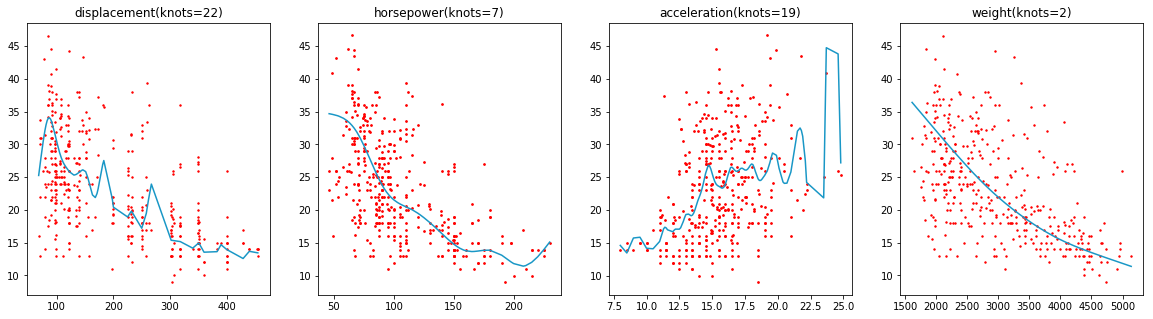

In [324]:
fig=plt.figure(figsize=(20,5))
ax = fig.subplots(1, 4, sharey=False)

ax[0].plot(np.sort(dis,kind="stable"),np.asarray(lin1['yhat']).flatten(),c="#1997c6")
y=mpg[np.argsort(dis,kind="stable")]
ax[0].scatter(np.sort(dis,kind="stable"),y,c="red",s=2)

y=mpg[np.argsort(wei,kind="stable")]
ax[3].plot(np.sort(wei,kind="stable"),np.asarray(lin4['yhat']).flatten(),c="#1997c6")
ax[3].scatter(np.sort(wei,kind="stable"),y,c="red",s=2)

y=mpg[np.argsort(horse,kind="stable")]
x=np.sort(horse,kind="stable")
ax[1].scatter(x,y,c="red",s=2.9)
ax[1].plot(x,np.asarray(lin2['yhat']).flatten(),c="#1997c6")

y=mpg[np.argsort(ace,kind="stable")]
x=np.sort(ace,kind="stable")
ax[2].scatter(x,y,c="red",s=2.9)
ax[2].plot(x,np.asarray(lin3['yhat']).flatten(),c="#1997c6")

ax[3].set_title("weight("+"knots=2"+")")
ax[0].set_title("displacement("+"knots=22"+")")
ax[1].set_title("horsepower("+"knots=7"+")")
ax[2].set_title("acceleration("+"knots=19"+")")